# Barcharts based on AAR for US States and TX Couinties

In [173]:
import matplotlib.pyplot as plt
import pandas as pd

In [174]:
# import Data
path="../data/YK_States_AAR.csv"
stateAAR_df = pd.read_csv(path)
path="../data/YK_TXcounty_AAR.csv"
txcountyAAR_df = pd.read_csv(path)
txcountyAAR_df

,County,ID,Yearly Accident rate,Population,Accident rate by 1000 people
0,Harris,82746,27582.0,4646630,5.94
1,Dallas,54418,18139.3,2606868,6.96
2,Travis,52030,17343.3,1226805,14.14
3,Bexar,19347,6449.0,1952843,3.30
4,Tarrant,13112,4370.7,2049770,2.13
...,...,...,...,...,...
206,Stephens,1,0.3,9364,0.03
207,Coryell,1,0.3,75280,0.00
208,Runnels,1,0.3,10277,0.03
209,San Augustine,1,0.3,8286,0.04


In [175]:
# creating plot data for states
plot_data=stateAAR_df[['State', 'Yearly Accident rate']].sort_values('Yearly Accident rate',ascending=False, ignore_index=True)[:10]
plot_data

,State,Yearly Accident rate
0,CA,174269.7
1,TX,82766.0
2,FL,62239.3
3,SC,47892.3
4,NC,45439.0
5,NY,39257.0
6,VA,24489.3
7,MI,24019.7
8,GA,23460.7
9,OR,23278.0


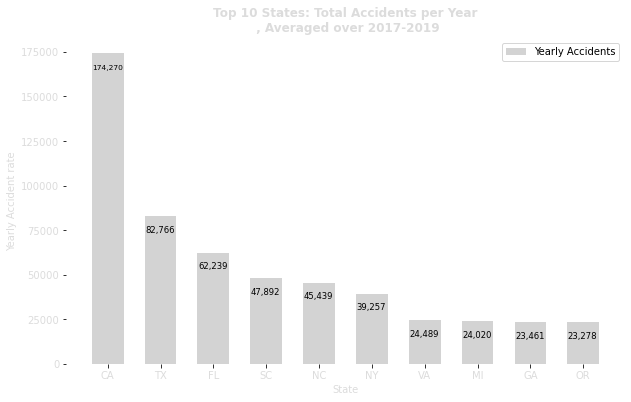

In [176]:
# setup plot area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
x_label=plot_data.columns[0]
y_label=plot_data.columns[1]
plt.ylabel(y_label, color=color_t)
plt.xlabel(x_label, color=color_t)
plt.xticks(rotation=0)
#Plot data
x=plot_data['State']
y=plot_data['Yearly Accident rate']
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
plt.title('Top 10 States: Total Accidents per Year\n , Averaged over 2017-2019',color=color_t,fontweight="bold")
plot1=plt.bar(x,y,
              color="lightgrey",
              label='Yearly Accidents',
              width=0.6)


# loop to create labels on the chart
for i in plot_data.index:
    y=plot_data['Yearly Accident rate'][i]
    if y<100000:
        ft_sz=8.5
    else:
        ft_sz=7.5
    plt.text(x=i-.29
             , y=y-9000 , s=f"{y:,.0f}" , fontdict=dict(fontsize=ft_sz))



plt.legend(loc='upper right')


plt.show
# save png
plt.savefig('../Analysis/output/YK_US_States_Accidents_bar_plt.png', facecolor='dimgray')

In [177]:
# plot data for AAR per 1000 people
plot_data=stateAAR_df[['State', 'Accident rate by 1000 people']].sort_values('Accident rate by 1000 people',ascending=False,ignore_index=True)[:14]
plot_data

,State,Accident rate by 1000 people
0,SC,9.30
1,OR,5.52
2,CA,4.41
3,NC,4.33
4,OK,4.27
5,UT,4.20
6,LA,3.70
7,MN,3.56
8,FL,2.90
9,NE,2.88


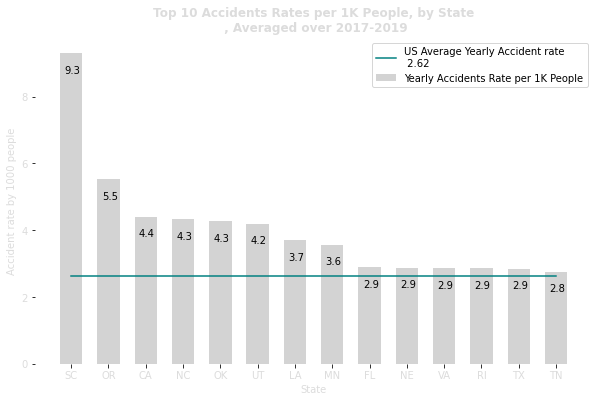

In [179]:
#Setup chart area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
x_label=plot_data.columns[0]
y_label=plot_data.columns[1]
plt.ylabel(y_label, color=color_t)
plt.xlabel(x_label, color=color_t)
plt.xticks(rotation=0)
#Plot data
x=plot_data['State']
y=plot_data['Accident rate by 1000 people']
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
plt.title('Top 10 Accidents Rates per 1K People, by State\n , Averaged over 2017-2019',color=color_t,fontweight="bold")
plt.bar(x,y,
              color="lightgrey",
              label='Yearly Accidents Rate per 1K People',
              width=0.6)


# loop to create labels on the chart
for i in plot_data.index:
    y=plot_data['Accident rate by 1000 people'][i]
    plt.text(x=i-.18 , y=y-.6 , s=f"{y:.1f}" , fontdict=dict(fontsize=10))
# plot average line
US_acc=stateAAR_df['Yearly Accident rate'].sum()
US_people=stateAAR_df['2019'].sum()
US_rate=US_acc/(US_people/1000)
plt.plot([0,len(plot_data)-1],[US_rate,US_rate], "k-", color='teal',
         label= f"US Average Yearly Accident rate  \n {US_rate:.2f}")

plt.legend(loc='upper right')
plt.show
# save png
plt.savefig('../Analysis/output/YK_US_States_AARs_bar_plt.png', facecolor='dimgray')

In [180]:
# repeat same for TX counties but 
plot_data=txcountyAAR_df[['County', 'Yearly Accident rate']].sort_values('Yearly Accident rate',ascending=False,ignore_index=True)[:10]
plot_data

,County,Yearly Accident rate
0,Harris,27582.0
1,Dallas,18139.3
2,Travis,17343.3
3,Bexar,6449.0
4,Tarrant,4370.7
5,El Paso,3162.3
6,Williamson,970.0
7,Collin,798.7
8,Denton,681.7
9,Montgomery,393.0


In [181]:
# plot data for AAR plot
plot_data=txcountyAAR_df[['County', 'Accident rate by 1000 people']].sort_values('Accident rate by 1000 people',ascending=False,ignore_index=True)[:12]
plot_data

,County,Accident rate by 1000 people
0,Travis,14.14
1,Dallas,6.96
2,Harris,5.94
3,El Paso,3.78
4,Bexar,3.30
5,Loving,3.06
6,Terrell,3.01
7,Tarrant,2.13
8,Kimble,2.13
9,Wichita,2.10


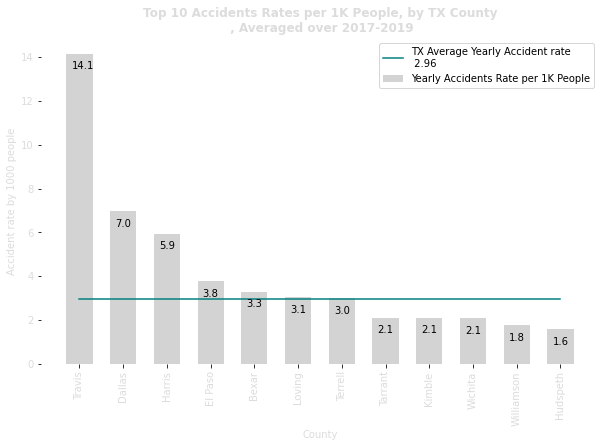

In [184]:
# Setup plot area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
x_label=plot_data.columns[0]
y_label=plot_data.columns[1]
plt.ylabel(y_label, color=color_t)
plt.xlabel(x_label, color=color_t)
plt.xticks(rotation=90)
#Plot Data
x=plot_data['County']
y=plot_data['Accident rate by 1000 people']
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
plt.title('Top 10 Accidents Rates per 1K People, by TX County\n , Averaged over 2017-2019',color=color_t,fontweight="bold")
plt.bar(x,y,
              color="lightgrey",
              label='Yearly Accidents Rate per 1K People',
              width=0.6)

# loop to create labels on the chart
for i in plot_data.index:
    y=plot_data['Accident rate by 1000 people'][i]
    plt.text(x=i-.18 , y=y-.7 , s=f"{y:.1f}" , fontdict=dict(fontsize=10))
# plot average line
TX_acc=txcountyAAR_df['Yearly Accident rate'].sum()
TX_people=txcountyAAR_df['Population'].sum()
TX_rate=TX_acc/(TX_people/1000)
plt.plot([0,len(plot_data)-1],[TX_rate,TX_rate], "k-", color='teal',
         label= f"TX Average Yearly Accident rate  \n {TX_rate:.2f}")

plt.legend(loc='upper right')
plt.show
#save png
plt.savefig('../Analysis/output/YK_TX_Counties_AARs_bar_plt.png', facecolor='dimgray')